In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "/content/all_tickets.csv"
data = pd.read_csv(file_path)

In [3]:
print(data.head())
print(data.info())
print(data.describe())

                                   title  \
0                                    NaN   
1                   connection with icon   
2                   work experience user   
3                 requesting for meeting   
4  reset passwords for external accounts   

                                                body  ticket_type  category  \
0  hi since recruiter lead permission approve req...            1         4   
1  icon dear please setup icon per icon engineers...            1         6   
2  work experience user hi work experience studen...            1         5   
3  requesting meeting hi please help follow equip...            1         5   
4  re expire days hi ask help update passwords co...            1         4   

   sub_category1  sub_category2  business_service  urgency  impact  
0              2             21                71        3       4  
1             22              7                26        3       4  
2             13              7                32    

In [4]:
data.fillna("Unknown", inplace=True)

In [5]:
grouped_data = data.groupby(['category', 'sub_category1']).size().reset_index(name='count')
print(grouped_data.sort_values('count', ascending=False).head())

    category  sub_category1  count
19         4              2   9685
20         4              3   8090
18         4              1   6537
34         5             13   6427
25         4             21   5710


In [7]:
data['combined_text'] = data['title'].fillna('') + " " + data['body']

In [8]:
# Analyze the distribution of key numerical attributes
numerical_cols = ['ticket_type', 'category', 'sub_category1', 'sub_category2', 'business_service', 'urgency', 'impact']
print(data[numerical_cols].describe())

        ticket_type      category  sub_category1  sub_category2  \
count  48549.000000  48549.000000   48549.000000   48549.000000   
mean       0.713115      4.491153      11.614390      32.004634   
std        0.452312      1.103556      13.752707      33.602122   
min        0.000000      0.000000       0.000000       0.000000   
25%        0.000000      4.000000       2.000000       7.000000   
50%        1.000000      4.000000       3.000000      21.000000   
75%        1.000000      5.000000      21.000000      53.000000   
max        1.000000     12.000000      58.000000     114.000000   

       business_service       urgency        impact  
count      48549.000000  48549.000000  48549.000000  
mean          49.482605      2.506066      3.677460  
std           22.806100      0.855646      0.591513  
min            0.000000      0.000000      0.000000  
25%           32.000000      2.000000      3.000000  
50%           49.000000      3.000000      4.000000  
75%           67.0

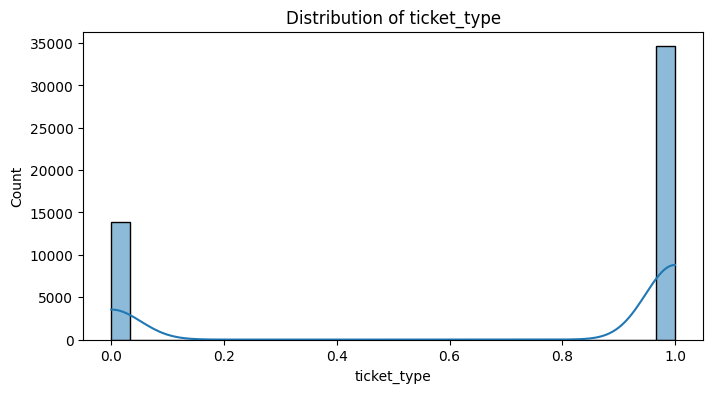

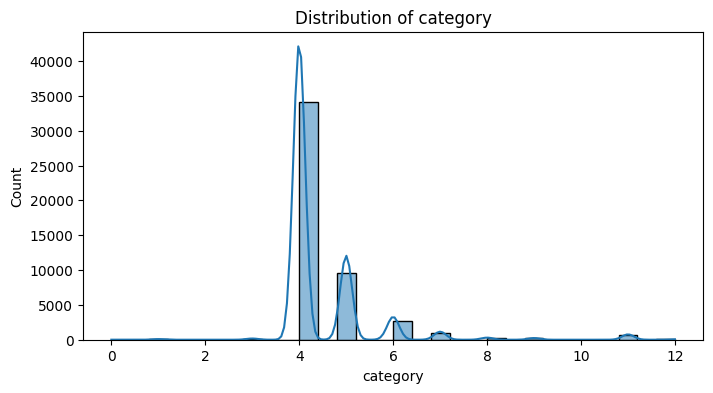

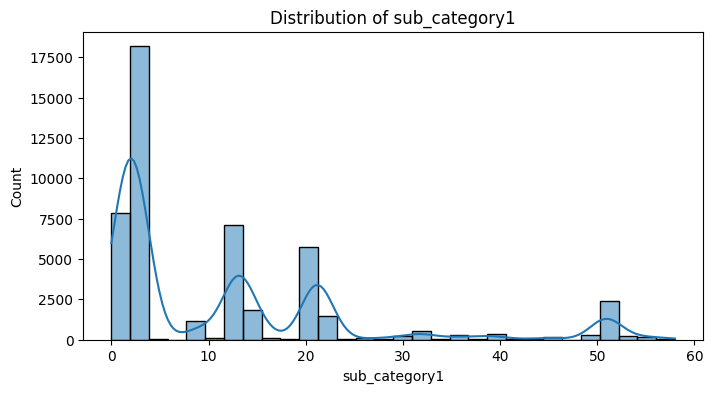

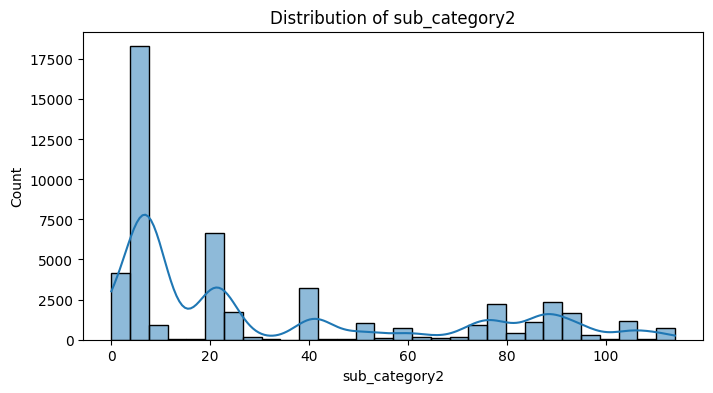

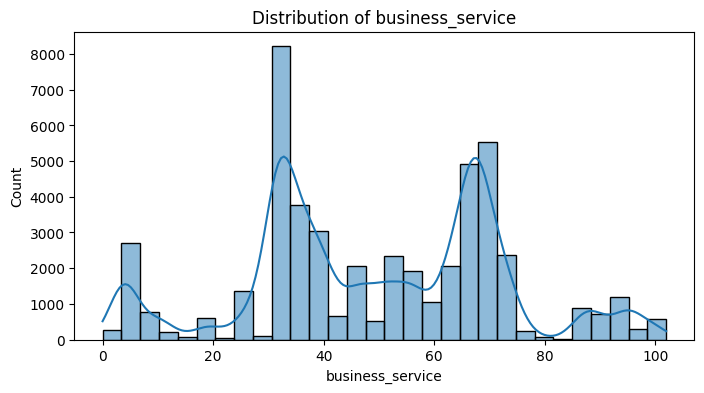

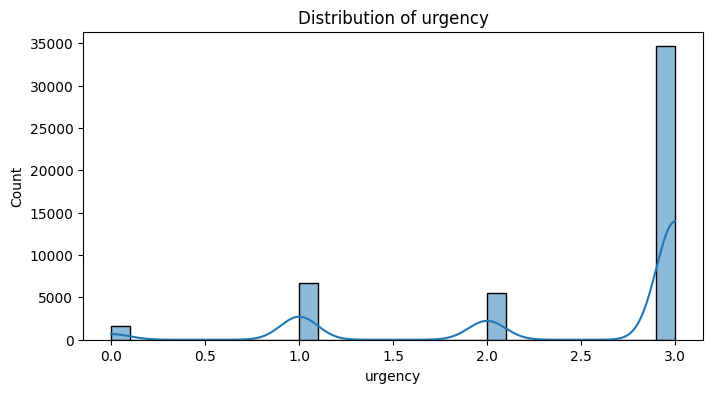

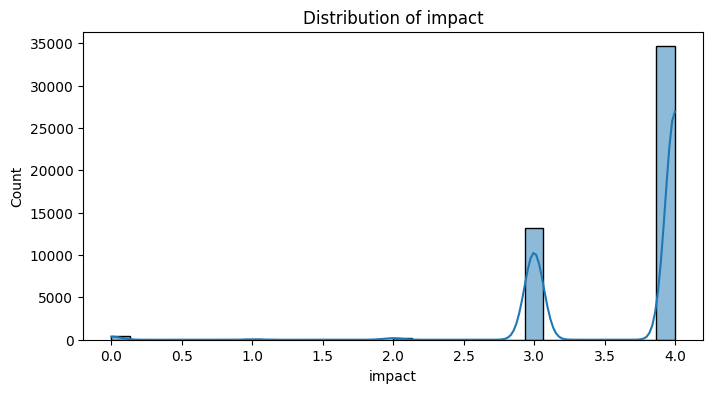

In [9]:
# Visualize distributions
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [10]:
# Group data by key attributes and count
grouped_data = data.groupby(['category', 'urgency', 'impact']).size().reset_index(name='count')
print(grouped_data.head())

   category  urgency  impact  count
0         0        3       4      4
1         1        0       0      1
2         1        1       2      1
3         1        1       3     12
4         1        2       3     11


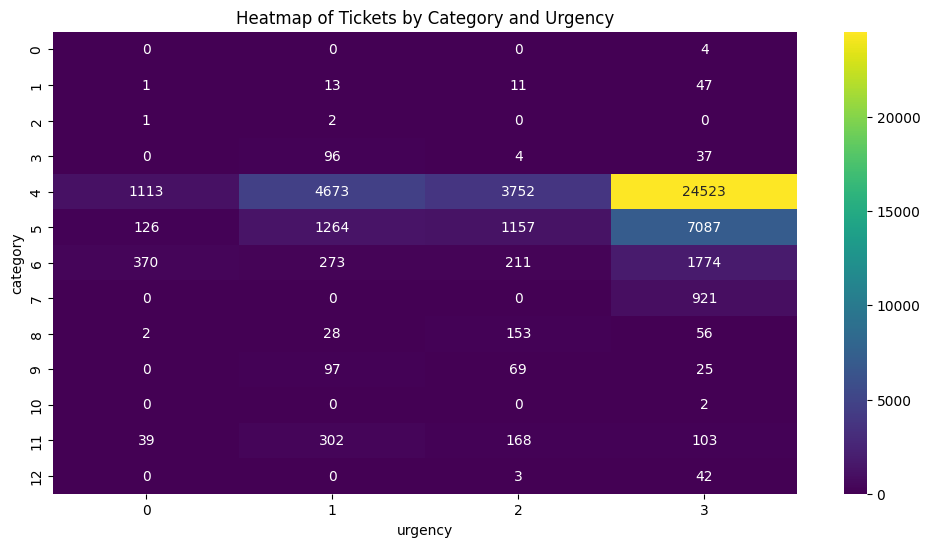

In [12]:
# Visualize grouped data
plt.figure(figsize=(12, 6))
heatmap_data = grouped_data.pivot_table(index='category', columns='urgency', values='count', aggfunc='sum', fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g')
plt.title("Heatmap of Tickets by Category and Urgency")
plt.show()

In [13]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = vectorizer.fit_transform(data['combined_text'])

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(tfidf_matrix)

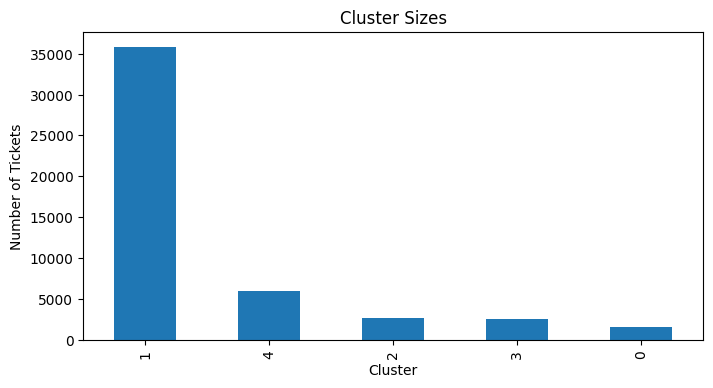

In [15]:
cluster_sizes = data['cluster'].value_counts()
plt.figure(figsize=(8, 4))
cluster_sizes.plot(kind='bar')
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Tickets")
plt.show()

In [20]:
# Analyze clusters further for meaningful insights
cluster_counts = data['cluster'].value_counts()
print(cluster_counts)

cluster
1    35878
4     5986
2     2636
3     2511
0     1538
Name: count, dtype: int64


In [21]:
# Check key terms in each cluster for actionable insights
terms = vectorizer.get_feature_names_out()
for i in range(kmeans.n_clusters):
    cluster_terms = kmeans.cluster_centers_[i].argsort()[-10:][::-1]
    print(f"Cluster {i} Top Terms: ", [terms[ind] for ind in cluster_terms])

Cluster 0 Top Terms:  ['po', 'purchase', 'item', 'purchased', 'administrator', 'receipts', 'ordered', 'consideration', 'receive', 'mandatory']
Cluster 1 Top Terms:  ['pm', 'hi', 'thank', 'regards', 'hello', 'thanks', 'access', 'add', 'change', 'help']
Cluster 2 Top Terms:  ['confluence', 'monitor', 'wants', 'access', 'decline', 'accept', 'pm', 'thank', 'hi', 'requests']
Cluster 3 Top Terms:  ['starter', 'form', 'new', 'leaver', 'attached', 'pm', 'date', 'officer', 'thank', 'administration']
Cluster 4 Top Terms:  ['error', 'card', 'report', 'leave', 'submit', 'sent', 'issue', 'annual', 'oracle', 'hi']


In [22]:
# Grouping Analysis
impact_group = data.groupby(['category', 'impact']).size().reset_index(name='count')
print(impact_group.sort_values('count', ascending=False).head())

    category  impact  count
12         4       4  24523
11         4       3   9303
17         5       4   7087
16         5       3   2503
22         6       4   1774


In [23]:
# Root cause analysis for high-count categories and impacts
high_impact = impact_group[impact_group['impact'] >= 3]
print(high_impact)

    category  impact  count
0          0       4      4
3          1       3     23
4          1       4     47
5          2       3      3
6          3       3    100
7          3       4     37
11         4       3   9303
12         4       4  24523
16         5       3   2503
17         5       4   7087
21         6       3    764
22         6       4   1774
23         7       4    921
25         8       3    175
26         8       4     56
27         9       3    166
28         9       4     25
29        10       4      2
32        11       3    144
33        11       4    103
34        12       3      3
35        12       4     42


In [24]:
# Save detailed analysis for records
data.to_csv('detailed_analysis.csv', index=False)
print("Analysis saved to 'detailed_analysis.csv'")

Analysis saved to 'detailed_analysis.csv'
